In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
# train_data = pd.read_csv("train_set.csv")
# test_data = pd.read_csv("test_set.csv")

In [3]:
df = pd.read_csv("self_driving_5k_v1.csv", header = None)

In [4]:
df.iloc[:, -1].value_counts()

1.0    1913
2.0    1697
0.0    1390
Name: 49302, dtype: int64

In [5]:
dist_len = 150
image_len = (len(df.columns) - 1) - dist_len

In [6]:
stop_instances = []
for i in tqdm(range(1500)):
    dist_data = np.ones(dist_len)
    img_data = np.random.randint(255, size = (image_len))
    instance = np.concatenate((dist_data, img_data, np.array([3])))
    stop_instances.append(instance)

100%|██████████| 1500/1500 [00:01<00:00, 1450.79it/s]


In [7]:
df = pd.concat([df, pd.DataFrame(stop_instances)])

In [8]:
df.iloc[:, -1].value_counts()

1.0    1913
2.0    1697
3.0    1500
0.0    1390
Name: 49302, dtype: int64

In [9]:
df = shuffle(df)
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,49293,49294,49295,49296,49297,49298,49299,49300,49301,49302
0,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,1.0,3.0,0.0,1.0,3.0,0.0,1.0,3.0,0.0,1.0
1,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,3.0,5.0,1.0,4.0,6.0,2.0,4.0,6.0,2.0,1.0
4,0.185,0.186,0.187,0.189,0.192,0.195,0.195,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6496,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,11.0,19.0,28.0,9.0,18.0,29.0,10.0,19.0,30.0,1.0
6497,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6498,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X = df.iloc[:, :-1]
y = keras.utils.to_categorical(df.iloc[:, -1])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5200, 49302), (1300, 49302), (5200, 4), (1300, 4))

In [14]:
feature_shape = [X_train.shape[1]]

In [15]:
feature_shape

[49302]

In [16]:
model = keras.Sequential([
    keras.layers.Dense(units=256, input_shape=(feature_shape), activation = "relu"),
    keras.layers.Dense(units=4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               12621568  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 12,622,596
Trainable params: 12,622,596
Non-trainable params: 0
_________________________________________________________________


In [17]:
save_best = keras.callbacks.ModelCheckpoint(filepath = "self_driving_5k_v1.h5", 
                                            monitor = "val_accuracy",
                                           mode = "max",
                                           save_best_only = True)

history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks = [save_best])

Epoch 1/500
163/163 [==============================] - 348s 2s/step - loss: 339.2170 - accuracy: 0.8435 - val_loss: 230.4342 - val_accuracy: 0.9077
Epoch 2/500
163/163 [==============================] - 25s 152ms/step - loss: 31.4689 - accuracy: 0.9731 - val_loss: 6.3429 - val_accuracy: 0.9877
Epoch 3/500
163/163 [==============================] - 24s 146ms/step - loss: 11.8807 - accuracy: 0.9812 - val_loss: 6.0991 - val_accuracy: 0.9923
Epoch 4/500
163/163 [==============================] - 21s 127ms/step - loss: 0.4763 - accuracy: 0.9942 - val_loss: 2.7414 - val_accuracy: 0.9915
Epoch 5/500
163/163 [==============================] - 24s 145ms/step - loss: 2.4515 - accuracy: 0.9933 - val_loss: 3.1671 - val_accuracy: 0.9946
Epoch 6/500
163/163 [==============================] - 21s 128ms/step - loss: 0.2002 - accuracy: 0.9967 - val_loss: 3.9504 - val_accuracy: 0.9938
Epoch 7/500
163/163 [==============================] - 26s 160ms/step - loss: 298.8481 - accuracy: 0.9333 - val_loss: 17

Epoch 57/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0013 - accuracy: 0.9992 - val_loss: 4.4138 - val_accuracy: 0.9969
Epoch 58/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 4.4144 - val_accuracy: 0.9962
Epoch 59/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0037 - accuracy: 0.9987 - val_loss: 4.4164 - val_accuracy: 0.9962
Epoch 60/500
163/163 [==============================] - 20s 124ms/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 4.4780 - val_accuracy: 0.9846
Epoch 61/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0058 - accuracy: 0.9977 - val_loss: 4.4157 - val_accuracy: 0.9962
Epoch 62/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 4.4165 - val_accuracy: 0.9969
Epoch 63/500
163/163 [==============================] - 20s 124ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 4

163/163 [==============================] - 20s 123ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 4.4434 - val_accuracy: 0.9962
Epoch 113/500
163/163 [==============================] - 20s 123ms/step - loss: 2.0172e-04 - accuracy: 1.0000 - val_loss: 4.4435 - val_accuracy: 0.9962
Epoch 114/500
163/163 [==============================] - 20s 124ms/step - loss: 1.0214e-04 - accuracy: 1.0000 - val_loss: 4.4442 - val_accuracy: 0.9962
Epoch 115/500
163/163 [==============================] - 20s 122ms/step - loss: 1.4356e-04 - accuracy: 1.0000 - val_loss: 4.4443 - val_accuracy: 0.9962
Epoch 116/500
163/163 [==============================] - 20s 121ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 4.4494 - val_accuracy: 0.9969
Epoch 117/500
163/163 [==============================] - 20s 124ms/step - loss: 3.4062e-04 - accuracy: 0.9998 - val_loss: 4.4424 - val_accuracy: 0.9962
Epoch 118/500
163/163 [==============================] - 20s 122ms/step - loss: 1.7525e-04 - accuracy: 1.0000 

163/163 [==============================] - 20s 125ms/step - loss: 2.7511e-05 - accuracy: 1.0000 - val_loss: 4.4572 - val_accuracy: 0.9962
Epoch 167/500
163/163 [==============================] - 20s 123ms/step - loss: 2.4956e-05 - accuracy: 1.0000 - val_loss: 4.4572 - val_accuracy: 0.9962
Epoch 168/500
163/163 [==============================] - 20s 123ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 4.4627 - val_accuracy: 0.9969
Epoch 169/500
163/163 [==============================] - 20s 124ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 4.4649 - val_accuracy: 0.9962
Epoch 170/500
163/163 [==============================] - 20s 123ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 4.4590 - val_accuracy: 0.9962
Epoch 171/500
163/163 [==============================] - 20s 123ms/step - loss: 1.4621e-04 - accuracy: 1.0000 - val_loss: 4.4597 - val_accuracy: 0.9962
Epoch 172/500
163/163 [==============================] - 20s 123ms/step - loss: 5.6046e-05 - accuracy: 1.0000 - va

163/163 [==============================] - 20s 122ms/step - loss: 0.0231 - accuracy: 0.9967 - val_loss: 4.4897 - val_accuracy: 0.9954
Epoch 221/500
163/163 [==============================] - 20s 123ms/step - loss: 8.6837e-04 - accuracy: 0.9996 - val_loss: 4.5230 - val_accuracy: 0.9962
Epoch 222/500
163/163 [==============================] - 20s 123ms/step - loss: 32.7122 - accuracy: 0.9983 - val_loss: 1600.2731 - val_accuracy: 0.7369
Epoch 223/500
163/163 [==============================] - 20s 123ms/step - loss: 627.0402 - accuracy: 0.9169 - val_loss: 60.5355 - val_accuracy: 0.9854
Epoch 224/500
163/163 [==============================] - 20s 123ms/step - loss: 44.7674 - accuracy: 0.9863 - val_loss: 34.8296 - val_accuracy: 0.9915
Epoch 225/500
163/163 [==============================] - 20s 123ms/step - loss: 4.7619 - accuracy: 0.9971 - val_loss: 13.8834 - val_accuracy: 0.9946
Epoch 226/500
163/163 [==============================] - 20s 123ms/step - loss: 3.9575 - accuracy: 0.9969 - val_

163/163 [==============================] - 20s 123ms/step - loss: 6.5150e-06 - accuracy: 1.0000 - val_loss: 9.7228 - val_accuracy: 0.9962
Epoch 275/500
163/163 [==============================] - 20s 124ms/step - loss: 6.2503e-06 - accuracy: 1.0000 - val_loss: 9.7224 - val_accuracy: 0.9962
Epoch 276/500
163/163 [==============================] - 20s 123ms/step - loss: 6.1256e-06 - accuracy: 1.0000 - val_loss: 9.7223 - val_accuracy: 0.9969
Epoch 277/500
163/163 [==============================] - 20s 123ms/step - loss: 6.1981e-06 - accuracy: 1.0000 - val_loss: 9.7223 - val_accuracy: 0.9969
Epoch 278/500
163/163 [==============================] - 20s 122ms/step - loss: 7.9899e-06 - accuracy: 1.0000 - val_loss: 9.7223 - val_accuracy: 0.9962
Epoch 279/500
163/163 [==============================] - 20s 123ms/step - loss: 6.3029e-06 - accuracy: 1.0000 - val_loss: 9.7225 - val_accuracy: 0.9962
Epoch 280/500
163/163 [==============================] - 20s 122ms/step - loss: 6.2241e-06 - accuracy:

163/163 [==============================] - 20s 121ms/step - loss: 4.3348e-05 - accuracy: 1.0000 - val_loss: 9.7677 - val_accuracy: 0.9962
Epoch 329/500
163/163 [==============================] - 20s 124ms/step - loss: 2.5427e-05 - accuracy: 1.0000 - val_loss: 9.7671 - val_accuracy: 0.9962
Epoch 330/500
163/163 [==============================] - 20s 124ms/step - loss: 2.7462e-05 - accuracy: 1.0000 - val_loss: 9.7673 - val_accuracy: 0.9962
Epoch 331/500
163/163 [==============================] - 20s 123ms/step - loss: 2.9308e-05 - accuracy: 1.0000 - val_loss: 9.7663 - val_accuracy: 0.9962
Epoch 332/500
163/163 [==============================] - 20s 124ms/step - loss: 4.1682e-05 - accuracy: 1.0000 - val_loss: 9.7669 - val_accuracy: 0.9962
Epoch 333/500
163/163 [==============================] - 20s 122ms/step - loss: 1.9952e-05 - accuracy: 1.0000 - val_loss: 9.7663 - val_accuracy: 0.9962
Epoch 334/500
163/163 [==============================] - 20s 122ms/step - loss: 1.8497e-05 - accuracy:

163/163 [==============================] - 20s 123ms/step - loss: 3.4993e-06 - accuracy: 1.0000 - val_loss: 9.7837 - val_accuracy: 0.9962
Epoch 383/500
163/163 [==============================] - 20s 124ms/step - loss: 3.4915e-06 - accuracy: 1.0000 - val_loss: 9.7836 - val_accuracy: 0.9962
Epoch 384/500
163/163 [==============================] - 20s 123ms/step - loss: 0.0206 - accuracy: 0.9969 - val_loss: 9.9288 - val_accuracy: 0.9908
Epoch 385/500
163/163 [==============================] - 20s 124ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 9.8114 - val_accuracy: 0.9962
Epoch 386/500
163/163 [==============================] - 20s 123ms/step - loss: 5.8114e-06 - accuracy: 1.0000 - val_loss: 9.8118 - val_accuracy: 0.9962
Epoch 387/500
163/163 [==============================] - 20s 124ms/step - loss: 5.4265e-06 - accuracy: 1.0000 - val_loss: 9.8119 - val_accuracy: 0.9962
Epoch 388/500
163/163 [==============================] - 20s 122ms/step - loss: 5.2678e-06 - accuracy: 1.0000 

163/163 [==============================] - 20s 123ms/step - loss: 0.0091 - accuracy: 0.9992 - val_loss: 9.8454 - val_accuracy: 0.9962
Epoch 437/500
163/163 [==============================] - 20s 122ms/step - loss: 1.3364e-04 - accuracy: 1.0000 - val_loss: 9.8411 - val_accuracy: 0.9969
Epoch 438/500
163/163 [==============================] - 20s 122ms/step - loss: 7.0494e-06 - accuracy: 1.0000 - val_loss: 9.8439 - val_accuracy: 0.9969
Epoch 439/500
163/163 [==============================] - 20s 123ms/step - loss: 6.3703e-06 - accuracy: 1.0000 - val_loss: 9.8464 - val_accuracy: 0.9969
Epoch 440/500
163/163 [==============================] - 20s 122ms/step - loss: 6.7576e-06 - accuracy: 1.0000 - val_loss: 9.8491 - val_accuracy: 0.9977
Epoch 441/500
163/163 [==============================] - 20s 122ms/step - loss: 6.2719e-06 - accuracy: 1.0000 - val_loss: 9.8516 - val_accuracy: 0.9969
Epoch 442/500
163/163 [==============================] - 20s 122ms/step - loss: 5.3890e-06 - accuracy: 1.0

Epoch 490/500
163/163 [==============================] - 20s 122ms/step - loss: 1.9883e-06 - accuracy: 1.0000 - val_loss: 15.1046 - val_accuracy: 0.9962
Epoch 491/500
163/163 [==============================] - 20s 122ms/step - loss: 2.6428e-06 - accuracy: 1.0000 - val_loss: 15.1045 - val_accuracy: 0.9962
Epoch 492/500
163/163 [==============================] - 20s 124ms/step - loss: 2.5276e-06 - accuracy: 1.0000 - val_loss: 15.1044 - val_accuracy: 0.9962
Epoch 493/500
163/163 [==============================] - 20s 123ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 15.2619 - val_accuracy: 0.9892
Epoch 494/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0132 - accuracy: 0.9985 - val_loss: 15.1141 - val_accuracy: 0.9954
Epoch 495/500
163/163 [==============================] - 20s 122ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 15.1066 - val_accuracy: 0.9962
Epoch 496/500
163/163 [==============================] - 20s 121ms/step - loss: 2.5104e-06 - a

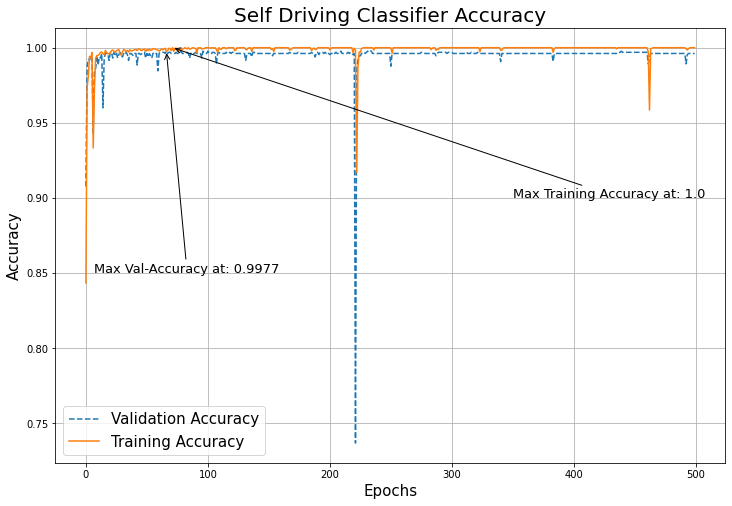

In [21]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_accuracy'], label = "Validation Accuracy", linestyle = '--')
plt.plot(history.epoch, history.history['accuracy'], label = "Training Accuracy")
plt.grid()
plt.annotate(f"Max Training Accuracy at: {round(max(history.history['accuracy']), 4)}", xy=(history.epoch[history.history['accuracy'].index(max(history.history['accuracy']))], max(history.history['accuracy'])), 
            xytext=(350, 0.90), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Max Val-Accuracy at: {round(max(history.history['val_accuracy']), 4)}", xy=(history.epoch[history.history['val_accuracy'].index(max(history.history['val_accuracy']))], max(history.history['val_accuracy'])), 
            xytext=(6.8, 0.85), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Self Driving Classifier Accuracy', fontsize=20)
plt.savefig('self_driving_clf_acc.jpg')

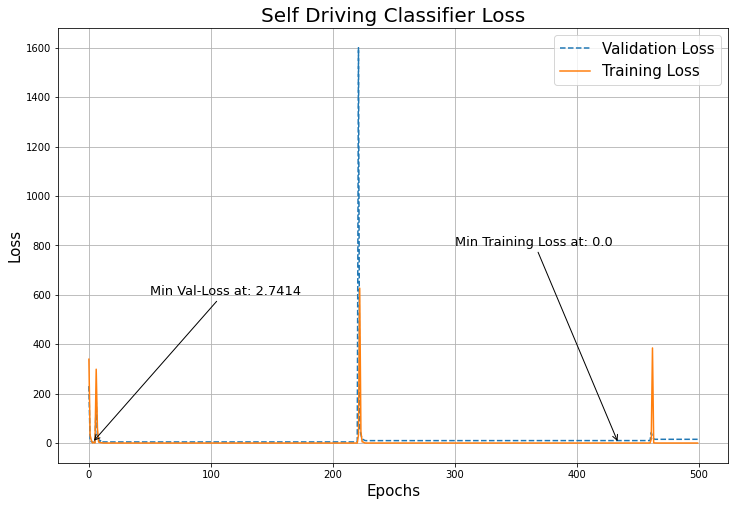

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(history.epoch, history.history['val_loss'], label = "Validation Loss", linestyle = '--')
plt.plot(history.epoch, history.history['loss'], label = "Training Loss")
plt.grid()
plt.annotate(f"Min Training Loss at: {round(min(history.history['loss']), 4)}", xy=(history.epoch[history.history['loss'].index(min(history.history['loss']))], min(history.history['loss'])), 
            xytext=(300, 800), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.annotate(f"Min Val-Loss at: {round(min(history.history['val_loss']), 4)}", xy=(history.epoch[history.history['val_loss'].index(min(history.history['val_loss']))], min(history.history['val_loss'])), 
            xytext=(50, 600), arrowprops=dict(arrowstyle='->'), fontsize=13)
plt.legend(fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Self Driving Classifier Loss', fontsize=20)
plt.savefig('self_driving_clf_loss.jpg')

In [19]:
saved_model = load_model('self_driving_5k_v2.h5')

In [20]:
saved_model.evaluate(X_test, y_test)

41/41 [==============================] - 3s 63ms/step - loss: 7.0312 - accuracy: 0.8046


[7.031161308288574, 0.8046153783798218]

In [1]:
import tensorflow as tf

In [22]:
#Model Conversion
trained_model = load_model('self_driving_5k_v2.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(trained_model)

tflite_model = converter.convert()
open('self_driving_5k_v2.tflite', 'wb').write(tflite_model)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmpgjm82y7z/assets


50491696